In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv(
    "Internet Velocidad Media de Descarga Provincias.csv",
    thousands=".",
    decimal=",")

Vista previa

In [5]:
print("=== Vista previa ===")
display(df.head())


=== Vista previa ===


,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2025,1,Buenos Aires,274.51
1,2025,1,CABA,319.34
2,2025,1,Catamarca,120.65
3,2025,1,Chaco,119.48
4,2025,1,Chubut,106.19


Información del dataset

In [6]:
print("=== Información del dataset ===")
df.info()


=== Información del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1080 non-null   int64  
 1   Trimestre               1080 non-null   int64  
 2   Provincia               1080 non-null   object 
 3   Mbps (Media de bajada)  1080 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 33.9+ KB


Valores nulos

In [7]:
print("=== Valores nulos por columna ===")
print(df.isna().sum())


=== Valores nulos por columna ===
Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64


Filas duplicadas

In [8]:
print("=== Filas duplicadas ===")
print(df.duplicated().sum())


=== Filas duplicadas ===
0


Estadísticos descriptivos

In [9]:
print("=== Estadísticos descriptivos ===")
display(df.describe(include="all"))


=== Estadísticos descriptivos ===


,Año,Trimestre,Provincia,Mbps (Media de bajada)
count,1080.000000,1080.000000,1080,1080.000000
unique,NaN,NaN,24,NaN
top,NaN,NaN,Buenos Aires,NaN
freq,NaN,NaN,45,NaN
mean,2019.133333,2.466667,NaN,30.911093
std,3.251121,1.127958,NaN,42.944432
min,2014.000000,1.000000,NaN,2.570000
25%,2016.000000,1.000000,NaN,5.057500
50%,2019.000000,2.000000,NaN,11.655000
75%,2022.000000,3.000000,NaN,37.732500


Asegurar columnas numéricas

In [10]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="ignore")

print("=== Tipos actualizados ===")
print(df.dtypes)


=== Tipos actualizados ===
Año                         int64
Trimestre                   int64
Provincia                  object
Mbps (Media de bajada)    float64
dtype: object


C:\Users\el6no\AppData\Local\Temp\ipykernel_22724\4123250016.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


Detección de outliers (IQR × 3, top 10)

In [13]:
def listar_outliers_iqr3(df, nombre_df="Dataset"):
    print(f"\n===== OUTLIERS (IQR × 10) – {nombre_df} =====")

    numeric_cols = df.select_dtypes(include=["float64","int64"]).columns
    
    for col in numeric_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lim_sup = q3 + 10 * iqr

        outliers = df[df[col] > lim_sup].sort_values(col, ascending=False)

        print(f"\nColumna: {col}")
        print(f"Límite superior: {lim_sup:,.2f}")
        print(f"Cantidad de outliers superiores: {len(outliers)}")
        display(outliers.head(10))


listar_outliers_iqr3(df, "Velocidad Media Provincias")



===== OUTLIERS (IQR × 10) – Velocidad Media Provincias =====

Columna: Año
Límite superior: 2,082.00
Cantidad de outliers superiores: 0


,Año,Trimestre,Provincia,Mbps (Media de bajada)



Columna: Trimestre
Límite superior: 23.00
Cantidad de outliers superiores: 0


,Año,Trimestre,Provincia,Mbps (Media de bajada)



Columna: Mbps (Media de bajada)
Límite superior: 364.48
Cantidad de outliers superiores: 0


,Año,Trimestre,Provincia,Mbps (Media de bajada)


Histograma de velocidad media

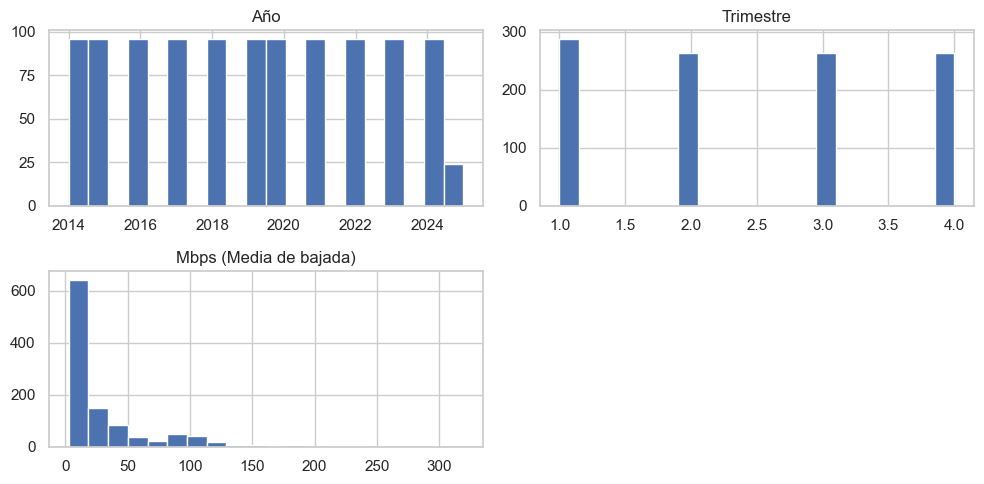

In [14]:
numeric_cols = df.select_dtypes(include=["float64","int64"]).columns

df[numeric_cols].hist(bins=20, figsize=(10,5))
plt.tight_layout()
plt.show()


Matriz de correlación

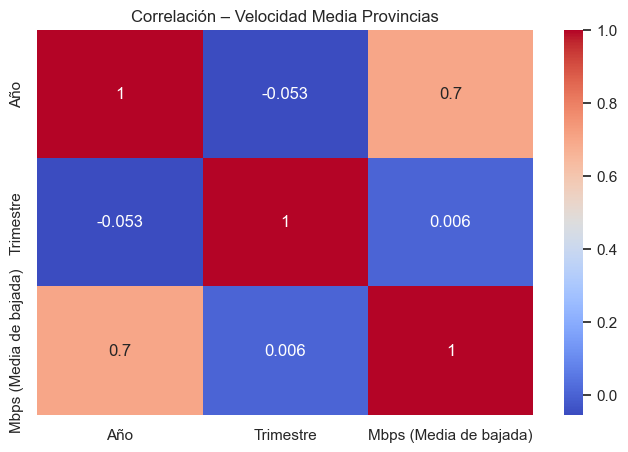

In [15]:
if len(numeric_cols) > 1:
    plt.figure(figsize=(8,5))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlación – Velocidad Media Provincias")
    plt.show()


Guardado del dataset limpio (coma decimal + “;”)

In [16]:
def convertir_decimales_a_coma(df):
    df_export = df.copy()
    for col in df_export.columns:
        if df_export[col].dtype in ["float64", "float32"]:
            df_export[col] = df_export[col].apply(lambda x: str(x).replace('.', ','))
    return df_export

df_export = convertir_decimales_a_coma(df)

df_export.to_csv(
    "Internet_Velocidad_Media_Descarga_Provincias_CLEAN.csv",
    sep=";",
    index=False,
    encoding="utf-8"
)

print("Archivo limpio guardado correctamente.")


Archivo limpio guardado correctamente.
